# Feature Selection
When building a machine learning model in real-life, it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. Furthermore adding more and more variables to a model increases the overall complexity of the model.

## Types of feature selection techniques

### A. Filter methods
Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.
- Variance Threshold
- Correlation Coefficient
- Information Gain
- Chi-square Test
- Fisher’s Score
- Mean Absolute Difference (MAD)

### B. Wrapper methods
Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.
- Forward Feature Selection
- Backward Feature Elimination
- Exhaustive Feature Selection
- Recursive Feature Elimination

### C. Embedded methods
These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.
- LASSO Regularization (L1)
- Random Forest Importance



## Variance Threshold
Feature selector that removes all low-variance features.

The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

#### from sklearn.feature_selection import VarianceThreshold
#### var_thres= VarianceThreshold(threshold=0)
#### var_thres.fit(X)

#### Lets practise on bigger dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [19]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [52]:
df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature selection\Complete-Feature-Selection-master\train.csv")

In [53]:
df.shape

(76020, 371)

In [54]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [55]:
X = df.drop(labels=['TARGET'], axis=1)

y = df['TARGET']

#### Lets apply the variance threshold

In [57]:
# we perform VarianceThreshold only of train set to avoid over fitting
# test set would be scaled 

var_thres= VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [58]:
# true represents that values are not constant
# False represents values are constant
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [59]:
### Finding non-constant features
sum(var_thres.get_support())

336

In [60]:
# Lets Find non-constant features 
len(X.columns[var_thres.get_support()])

336

In [61]:
# columns with constant values (0 variance)
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

34


In [62]:
# printing the columns with 0 variance
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [63]:
# dropping the columns with constant, 0 variance columns
X.drop(constant_columns,axis=1, inplace=True)

In [66]:
print("Before applying variance threshold ",df.shape)
print("After applying variance threshold ",X.shape)

Before applying variance threshold  (76020, 371)
After applying variance threshold  (76020, 336)


## Correlation Coefficient
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

#### cor = X.corr()
#### sns.heatmap(cor, annot=True)

In [67]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

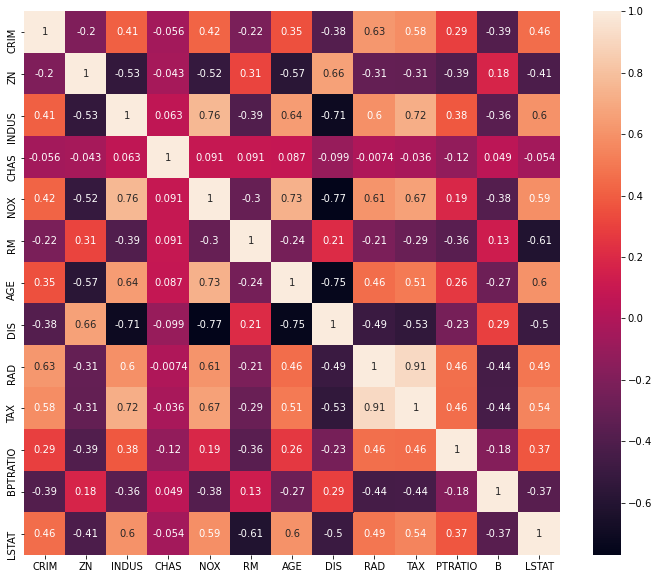

In [77]:
import seaborn as sns
#Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [94]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) > threshold) or (corr_matrix.iloc[i, j]) < -(threshold): # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
            
    return col_corr

In [97]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

1

In [98]:
corr_features

{'TAX'}

In [99]:
X.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


## Information Gain / Mutual Information
- The information gain of an attribute tells you how much information with respect to the classification target the attribute gives you. That is, it measures the difference in information between the cases where you know the value of the attribute and where you don't know the value of the attribute.

- I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.



## Information Gain for Classification problem

#### from sklearn.feature_selection import mutual_info_classif
#### mutual_info = mutual_info_classif(X, y)



###### Now we Will select the  top 5 important features
- from sklearn.feature_selection import SelectKBest
- sel_five_cols = SelectKBest(mutual_info_classif, k=5)
- sel_five_cols.fit(X, y)
- X.columns[sel_five_cols.get_support()]

In [102]:
df= pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [103]:
# let's consider Wine to be the target feature

X = df.drop(labels=['Wine'], axis=1)
y = df['Wine']

In [105]:
# mutual information ranges between 0 and 1
# 0 giving the lowest information wrt the target y
# 1 giving the highest information wrt the target y

from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.46536605, 0.26820024, 0.0556134 , 0.2488705 , 0.19109957,
       0.41456015, 0.66919138, 0.12919575, 0.28781045, 0.55232662,
       0.47463861, 0.49453904, 0.56910418])

In [107]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.669191
Proline                 0.569104
Color.int               0.552327
OD                      0.494539
Hue                     0.474639
Alcohol                 0.465366
Phenols                 0.414560
Proanth                 0.287810
Malic.acid              0.268200
Acl                     0.248871
Mg                      0.191100
Nonflavanoid.phenols    0.129196
Ash                     0.055613
dtype: float64

<AxesSubplot:>

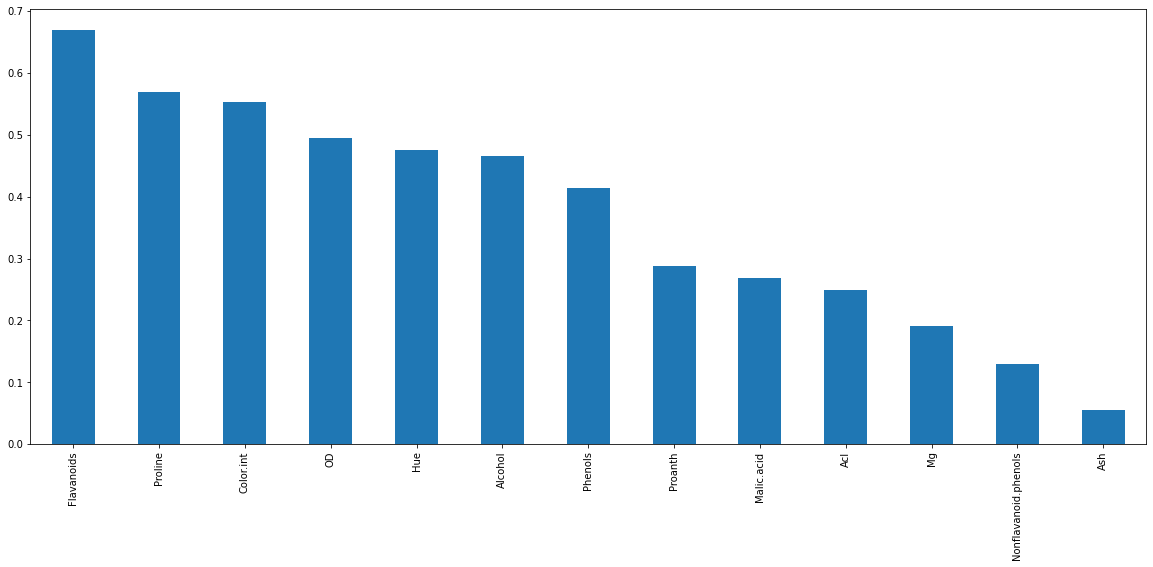

In [108]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [111]:
# used to select the best features for our problem from mutual_info_classif library directly!

from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X, y)

# get_support returns the corresponding index
X.columns[sel_five_cols.get_support()]

Index(['Alcohol', 'Flavanoids', 'Color.int', 'OD', 'Proline'], dtype='object')

## Information Gain for Regression problem

#### from sklearn.feature_selection import mutual_info_regression
#### mutual_info = mutual_info_regression(X, y)



##### Now we Will select the  top 5 important features
- from sklearn.feature_selection import SelectPercentile
- selected_top_columns = SelectPercentile(mutual_info_regression, percentile=40)
- selected_top_columns.fit(X, y)
- selected_top_columns.get_support()

In [112]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [113]:
# let's consider Alcohol to be the target feature

X = df.drop(labels=['Alcohol'], axis=1)
y = df['Alcohol']

In [114]:
from sklearn.feature_selection import mutual_info_regression

# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.47053673, 0.15822342, 0.17913686, 0.03735841, 0.1048399 ,
       0.0823676 , 0.31675911, 0.06133701, 0.20238783, 0.34339159,
       0.17890864, 0.17874812, 0.31500574])

In [116]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Wine                    0.470537
Color.int               0.343392
Flavanoids              0.316759
Proline                 0.315006
Proanth                 0.202388
Ash                     0.179137
Hue                     0.178909
OD                      0.178748
Malic.acid              0.158223
Mg                      0.104840
Phenols                 0.082368
Nonflavanoid.phenols    0.061337
Acl                     0.037358
dtype: float64

<AxesSubplot:>

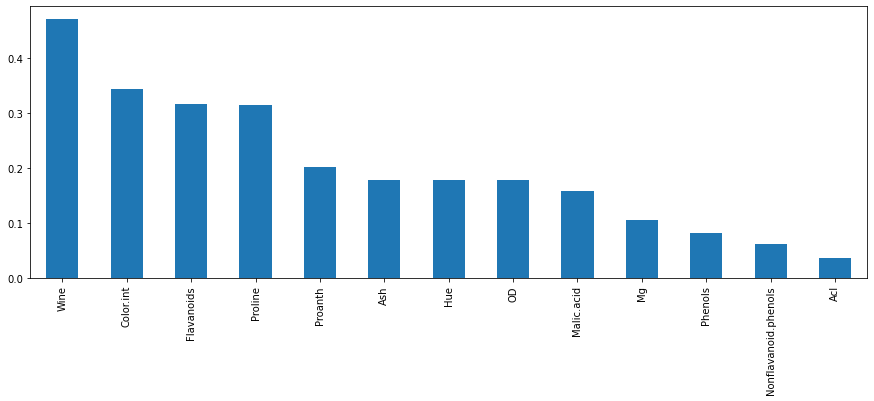

In [117]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


In [121]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 40 percentile features
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=40)
selected_top_columns.fit(X, y)

SelectPercentile(percentile=40,
                 score_func=<function mutual_info_regression at 0x0000015CD300C940>)

In [122]:
selected_top_columns.get_support()


array([ True, False, False, False, False, False,  True, False,  True,
        True, False, False,  True])

In [123]:
X.columns[selected_top_columns.get_support()]


Index(['Wine', 'Flavanoids', 'Proanth', 'Color.int', 'Proline'], dtype='object')

## Chi-Square Test
- The Chi-Square test is a statistical procedure used by researchers to examine the differences between categorical variables in the same population. For example, imagine that a research group is interested in whether or not education level and marital status are related for all people in the U.S.
- A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying. Therefore, a chi-square test is an excellent choice to help us better understand and interpret the relationship between our two categorical variables.

##### selecting the best 5 features

- from sklearn.feature_selection import SelectKBest
- from sklearn.feature_selection import chi2
- best_five_cols = SelectKBest(chi2, k=3)
- best_five_cols.fit(X, y)
- X.columns[best_five_cols.get_support()]

In [129]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [130]:
# selecting few categorical feature for this problem

df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [131]:
# peroforming encoding
df['sex']=np.where(df['sex']=="male",1,0)

### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

### let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)



In [132]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [133]:
X = df.drop('survived', axis=1)
y = df['survived']

In [134]:
# importing chi square library
### chi2 returns 2 values
### Fscore and the pvalue

from sklearn.feature_selection import chi2

f_p_values = chi2(X,y)
f_p_values

(array([92.70244698, 14.12425688, 14.64079273, 30.87369944]),
 array([6.07783826e-22, 1.71122816e-04, 1.30068490e-04, 2.75378563e-08]))

In [136]:
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values.sort_index(ascending=False)


sex         6.077838e-22
pclass      2.753786e-08
embarked    1.711228e-04
alone       1.300685e-04
dtype: float64

In [138]:
# We can select the best columns having the highest chi2 stat using the below method

from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
best_five_cols = SelectKBest(chi2, k=3)
best_five_cols.fit(X, y)

# get_support returns the corresponding index
X.columns[best_five_cols.get_support()]

Index(['sex', 'alone', 'pclass'], dtype='object')

## Fisher's score
- Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.
- Fisher's score is simply the gradient or the derivative of the log likelihood function, which means that setting the score equal to zero gives us the maximum likelihood estimate of the parameter.

In [142]:
!pip install skfeature-chappers

In [215]:
from skfeature.function.similarity_based import fisher_score
from sklearn.datasets import load_diabetes

db = load_diabetes()
y_train = db.target
X_train = db.data
columns = db.feature_names

idx = fisher_score.fisher_score(X_train, y_train, mode='rank') #returns rank directly instead of fisher score. so no need for feature_ranking
print(idx)

[1 7 3 6 2 0 9 8 5 4]


In [216]:
X = pd.DataFrame(X_train, columns=columns)
y = pd.DataFrame(y_train)

<AxesSubplot:>

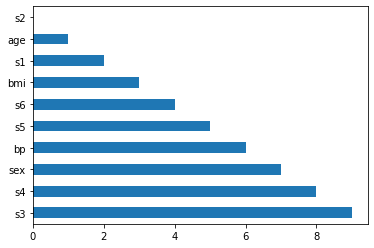

In [181]:
feat_imp = pd.Series(idx, columns).sort_values(ascending=False)
feat_imp.plot(kind='barh')

## Mean Absolute Difference (MAD)
- The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant. This means that higher the MAD, higher the discriminatory power.
- This is used to measure the difference between the independant variable, so higher the MAD the better. 

In [188]:
# calculate the MAD
mean_abs_diff = np.sum(np.abs(X - np.mean(X, axis=0)), axis=0) / X.shape[0]
mean_abs_diff

age    0.043300
sex    0.045754
bmi    0.041388
bp     0.021484
s1     0.022786
s2     0.023849
s3     0.037700
s4     0.014760
s5     0.031351
s6     0.024853
dtype: float64

<AxesSubplot:>

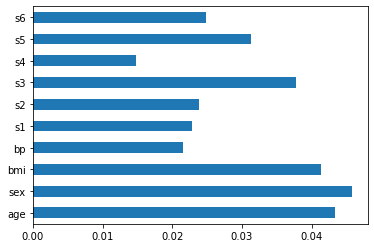

In [189]:
# plot the MAD
mean_abs_diff.plot(kind='barh')

## Forward Feature Selection
- Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.
- This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

In [191]:
!pip install mlxtend

In [192]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [193]:
# calling the linear regression model
# k_features tells us how many features should be selected. We’ve passed 4 so the model will train until 4 features are selected.
# training the forward feature selection model. 
# verbose = 2 will allow us to bring the model summary at each iteration.
# scoring based on the mean squared error metric, we will set scoring = ‘neg_mean_squared_error’

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [196]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished

[2021-12-22 06:10:20] Features: 1/4 -- score: -3903.0512513175213[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2021-12-22 06:10:20] Features: 2/4 -- score: -3220.1657544016634[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s finished

[2021-12-22 06:10:20] Features: 3/4 -- score: -3110.2029841625217[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [197]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['bmi', 'bp', 's3', 's5']


In [203]:
# creating a new dataframe using the above variables and adding the target variable
new_data = X[feat_names]

new_data['Target'] = y
# first five rows of the new data
new_data.head()

<ipython-input-203-c1049c30733c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Target'] = y


,bmi,bp,s3,s5,Target
0,0.061696,0.021872,-0.043401,0.019908,151.0
1,-0.051474,-0.026328,0.074412,-0.068330,75.0
2,0.044451,-0.005671,-0.032356,0.002864,141.0
3,-0.011595,-0.036656,-0.036038,0.022692,206.0
4,-0.036385,0.021872,0.008142,-0.031991,135.0


## Backward Feature selection
- Backward elimination is a feature selection technique while building a machine learning model. It is used to remove those features that do not have a significant effect on the dependent variable or prediction of output.
- This method works exactly opposite to the Forward Feature Selection method. Here, we start with all the features available and build a model. Next, we the variable from the model which gives the best evaluation measure value. This process is continued until the preset criterion is achieved.

In [207]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

# calling the linear regression model
# k_features tells us how many features should be selected. We’ve passed 4 so the model will train until 4 features are selected.
# training the forward feature selection model. 
# verbose = 2 will allow us to bring the model summary at each iteration.
# scoring based on the mean squared error metric, we will set scoring = ‘neg_mean_squared_error’

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=4, forward=False, verbose=2, scoring='neg_mean_squared_error')


sfs1 = sfs1.fit(X, y)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2021-12-22 06:23:29] Features: 9/4 -- score: -2961.095041971423[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2021-12-22 06:23:30] Features: 8/4 -- score: -2947.823047039327[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s finished

[2021-12-22 06:23:30] Features: 7/4 -- score: -2944.8921061073474[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [208]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['bmi', 'bp', 's1', 's5']


In [209]:
# creating a new dataframe using the above variables and adding the target variable
new_data = X[feat_names]

new_data['Target'] = y
# first five rows of the new data
new_data.head()

<ipython-input-209-c1049c30733c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Target'] = y


,bmi,bp,s1,s5,Target
0,0.061696,0.021872,-0.044223,0.019908,151.0
1,-0.051474,-0.026328,-0.008449,-0.068330,75.0
2,0.044451,-0.005671,-0.045599,0.002864,141.0
3,-0.011595,-0.036656,0.012191,0.022692,206.0
4,-0.036385,0.021872,0.003935,-0.031991,135.0


## Exhaustive Feature Selection
- In exhaustive feature selection, the performance of a machine learning algorithm is evaluated against all possible combinations of the features in the dataset. The feature subset that yields best performance is selected.
- This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

In [218]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

feature_names = ('sepal length', 'sepal width',
                 'petal length', 'petal width')
efs1 = efs1.fit(X, y, custom_feature_names=feature_names)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
df

Features: 15/15

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.966...",0.973333,"(sepal length, petal length, petal width)",0.017137,0.013333,0.006667
14,"(0, 1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length, sepal width, petal length, peta...",0.027096,0.021082,0.010541
13,"(1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(sepal width, petal length, petal width)",0.032061,0.024944,0.012472
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length,)",0.051412,0.04,0.02
6,"(0, 3)","[0.9666666666666667, 0.9666666666666667, 0.9, ...",0.953333,"(sepal length, petal width)",0.043691,0.033993,0.016997
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.9, ...",0.953333,"(petal length, petal width)",0.043691,0.033993,0.016997
3,"(3,)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.946667,"(petal width,)",0.058115,0.045216,0.022608
5,"(0, 2)","[0.9666666666666667, 1.0, 0.8666666666666667, ...",0.946667,"(sepal length, petal length)",0.058115,0.045216,0.022608
7,"(1, 2)","[0.9666666666666667, 1.0, 0.9, 0.9333333333333...",0.946667,"(sepal width, petal length)",0.043691,0.033993,0.016997
11,"(0, 1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.946667,"(sepal length, sepal width, petal width)",0.043691,0.033993,0.016997


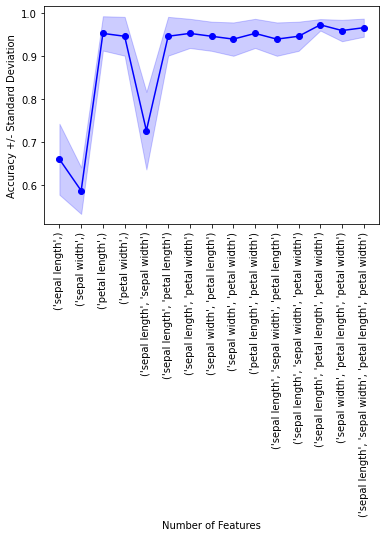

In [219]:
import matplotlib.pyplot as plt

metric_dict = efs1.get_metric_dict()

fig = plt.figure()
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

## Recursive Feature Elimination
- RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.
- This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

X = housing.data
y = housing.target
columns = housing['feature_names']


In [2]:
import pandas as pd

X = pd.DataFrame(X, columns=columns)
y= pd.DataFrame(y)

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


estimator = LinearRegression()

selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

selector.support_

array([ True, False,  True,  True, False, False,  True,  True])

In [4]:
rank = selector.ranking_
rank

array([1, 2, 1, 1, 4, 3, 1, 1])

In [8]:
# we select the features with rank 1 and discard the rest

feat_imp = pd.Series(rank, columns).sort_values(ascending=False)
feat_imp

Population    4
AveOccup      3
HouseAge      2
MedInc        1
AveRooms      1
AveBedrms     1
Latitude      1
Longitude     1
dtype: int32

## LASSO Regularization (L1)
- Lasso / L1 regularization has shrinks some of the coefficients to zero, therefore indicating that a certain predictor or certain features will be multiplied by zero to estimate the target. Thus, it won’t be added to the final prediction of the target—this means that these features can be removed because they aren’t contributing to the final prediction.

In [15]:
df= pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

# let's consider Wine to be the target feature

X = df.drop(labels=['Wine'], axis=1)
y = df['Wine']


In [17]:
# Lasso for Regression tasks, and Logistic Regression for Classification tasks.
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty l1.
selection = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state = 7))
selection.fit(X, y)


SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1', random_state=7,
                                             solver='liblinear'))

In [25]:
selected_features = selection.get_support()
selected_features

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True])

In [28]:
selected_feature_names = X.columns[(selection.get_support())]
selected_feature_names

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Flavanoids', 'Proanth',
       'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [22]:
# we select the features with rank 1 and discard the rest

feat_imp = pd.Series(selected_features, X.columns).sort_values(ascending=False)
feat_imp

Alcohol                  True
Malic.acid               True
Ash                      True
Acl                      True
Mg                       True
Flavanoids               True
Proanth                  True
Color.int                True
Hue                      True
OD                       True
Proline                  True
Phenols                 False
Nonflavanoid.phenols    False
dtype: bool

## Random Forest Importance
- A random forest is no more than a group of decision trees. Each of them is established over a random extraction of samples and features from the dataset, so an individual tree isn't able to see all the features or access all the observations.
- the importance of each feature is derived by how “pure” each of the sets is.
- The measure based on which optimal condition is chosen is known as an impurity. For classification, it’s typically either the Gini impurity or information gain/entropy; and for regression trees, it’s the variance.
- when training a tree, feature importance is calculated as the decrease in node impurity weighted in a tree. The higher the value, the more important the feature.

In [30]:
df= pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

# let's consider Wine to be the target feature

X = df.drop(labels=['Wine'], axis=1)
y = df['Wine']
columns = X.columns

In [35]:
# using the same data as above 

from sklearn.ensemble import RandomForestClassifier

# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=340)

# fit the model to start training.
model.fit(X, y)

# get the importance of the resulting features.
importances = model.feature_importances_


<ipython-input-35-0319efcc716d>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


In [32]:
X = pd.DataFrame(X, columns=columns)
y = pd.DataFrame(y)

<AxesSubplot:>

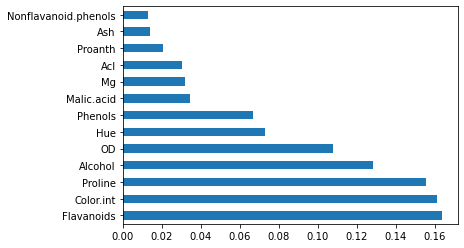

In [34]:
feat_imp = pd.Series(importances, columns).sort_values(ascending=False)
feat_imp.plot(kind='barh')